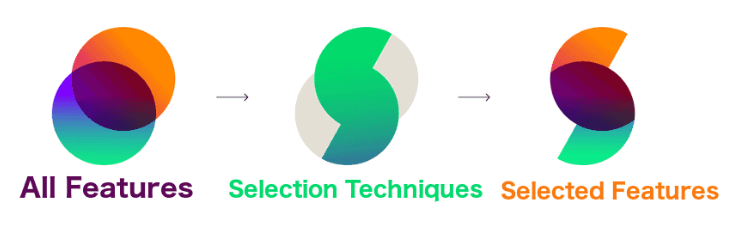

In [ ]:
!pip install klib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [ ]:
df = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv')
df_test = pd.read_csv('../input/tabular-playground-series-sep-2021/test.csv')

In [ ]:
#Not a imbalanced dataset
df.claim.value_counts()

In [ ]:
#Optimizing dataset
df=klib.data_cleaning(df)
df=klib.convert_datatypes(df)

In [ ]:
df.isna().sum()

In [ ]:
df=df.fillna(df.mean())

In [ ]:
X = df.iloc[:,1:-1]
y=df.iloc[:,-1]

# **Feature selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [ ]:
def select_features(X, y):
	fs = SelectKBest(score_func=f_classif, k='all')
	fs.fit(X, y)
	X_fs = fs.transform(X)
	return X_fs, fs

In [ ]:
X_fs,fs = select_features(X, y)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
features=[]
for i in range(len(fs.scores_)):
    if fs.scores_[i] >= 1:   #Here you can play with the threshold value for selecting the features
        features.append(i)

In [ ]:
len(features)

In [ ]:
X=X.iloc[:,features]

# **Visualize Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X.values)

In [ ]:
from sklearn.decomposition import PCA
pc = PCA(n_components=1)
X_pca = pc.fit_transform(X)

In [ ]:
X_pca=X_pca.reshape(X_pca.shape[0])

In [ ]:
plots = pd.DataFrame(np.column_stack([X_pca,y]),columns=['data','claim'])

In [ ]:
plots.head()

In [ ]:
sns.catplot(data=plots, x='claim',y='data',kind='box')